#### Training NNs on MNIST dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()



In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
Y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

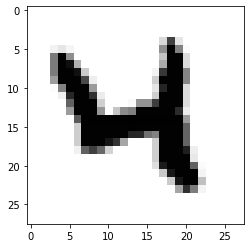

In [3]:
digit=X_train[20]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)

In [7]:
#Preparing and reshaping data
X_train = X_train / 255
X_test = X_test / 255
train_pixels=X_train.shape[1] * X_train.shape[2]
test_pixels=X_test.shape[1] * X_test.shape[2]
X_train=np.reshape(X_train, (X_train.shape[0],train_pixels))
X_test=np.reshape(X_test, (X_test.shape[0],test_pixels))

#Encoding labels
from tensorflow.keras.utils import to_categorical
num_classes = 10
Y_train_dummy = to_categorical(Y_train, num_classes)
Y_test_dummy = to_categorical(Y_test, num_classes)



In [14]:
#Model architecture
model = Sequential()
model.add(Dense(512, activation="relu", input_dim=train_pixels))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))


In [16]:
#Compilation
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

#Model training
model.fit(X_train, Y_train_dummy, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 205us/sample - loss: 0.5504 - accuracy: 0.8553
Epoch 2/10
60000/60000 [==============================] - 13s 215us/sample - loss: 0.2361 - accuracy: 0.9321
Epoch 3/10
60000/60000 [==============================] - 11s 190us/sample - loss: 0.1821 - accuracy: 0.9469
Epoch 4/10
60000/60000 [==============================] - 11s 181us/sample - loss: 0.1490 - accuracy: 0.9567
Epoch 5/10
60000/60000 [==============================] - 12s 201us/sample - loss: 0.1264 - accuracy: 0.9632
Epoch 6/10
60000/60000 [==============================] - 14s 239us/sample - loss: 0.1086 - accuracy: 0.9686
Epoch 7/10
60000/60000 [==============================] - 13s 217us/sample - loss: 0.0953 - accuracy: 0.9728
Epoch 8/10
60000/60000 [==============================] - 13s 219us/sample - loss: 0.0842 - accuracy: 0.9754
Epoch 9/10
60000/60000 [==============================] - 12s 208us/sample - loss: 0.0743 - accuracy: 0.9

In [23]:
from keras.utils import to_categorical
Y_test = to_categorical(Y_test)

loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

10000/1 - 1s - loss: 0.0476 - accuracy: 0.9712


#### Training accuracy - 98.08% Test accuracy - 97.12    
Test accuracy less than training accuracy due to overfitting. Adding a dropout layer can be used as experiment